In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter

import gzip
import json
import time
import pickle 
%matplotlib inline

In [3]:
import xml.etree.ElementTree as ET
root = ET.parse('c:/tmp/langs.model.xml')

keywords = []

for elem in root.findall('.//Keywords'):
    if elem.text:
        keywords.extend(elem.text.split(' '))

keywords = {s.strip() for s in keywords}

In [4]:
code = []
languages = []

i = 0

for line in gzip.open('c:/tmp/out.json.gz', mode='r'):
    raw = json.loads(line)
    tokens = [el.strip() for el in raw['source']]
    tokens = {el for el in tokens if el and el in keywords}
    if tokens:
        code.append(tokens)
        languages.append(raw['language'])

    i = i + 1
    if i % 10000 == 0:
        print time.strftime('%H:%M:%S'), 'processing %ds line...' % i

18:38:26 processing 10000s line...
18:38:33 processing 20000s line...
18:38:46 processing 30000s line...
18:38:51 processing 40000s line...
18:38:58 processing 50000s line...
18:39:05 processing 60000s line...
18:39:11 processing 70000s line...
18:39:15 processing 80000s line...
18:39:22 processing 90000s line...
18:39:28 processing 100000s line...
18:39:34 processing 110000s line...
18:39:40 processing 120000s line...
18:39:46 processing 130000s line...
18:39:53 processing 140000s line...
18:40:02 processing 150000s line...
18:40:10 processing 160000s line...
18:40:15 processing 170000s line...
18:40:21 processing 180000s line...
18:40:31 processing 190000s line...
18:40:39 processing 200000s line...
18:40:52 processing 210000s line...
18:41:02 processing 220000s line...
18:41:11 processing 230000s line...
18:41:17 processing 240000s line...
18:41:25 processing 250000s line...
18:41:33 processing 260000s line...
18:41:42 processing 270000s line...


IOError: CRC check failed 0x53eb3d85 != 0xf33a3631L

In [5]:
Counter(languages).most_common()

[(u'GNU C++', 112994),
 (u'GNU C++11', 107595),
 (u'MS C++', 16066),
 (u'Java 8', 9585),
 (u'GNU C', 6287),
 (u'Java 7', 5545),
 (u'Python 3', 3192),
 (u'Python 2', 3173),
 (u'FPC', 3111),
 (u'MS C#', 1398),
 (u'GNU C11', 1097),
 (u'Delphi', 618),
 (u'PyPy 3', 472),
 (u'PyPy 2', 440),
 (u'Scala', 377),
 (u'Haskell', 367),
 (u'Ruby', 324),
 (u'JavaScript', 147),
 (u'PHP', 144),
 (u'Perl', 143),
 (u'Go', 143),
 (u'Mono C#', 128),
 (u'Ocaml', 63),
 (u'D', 34)]

In [6]:
pl_norm = {'GNU C++': u'C/C++', 'GNU C++11': u'C/C++', 'MS C++': u'C/C++', 'GNU C': u'C/C++', 'GNU C11': u'C/C++',
           'Java 8': u'Java', 'Java 7': u'Java', 
           'Python 3': u'Python', 'Python 2': u'Python', 'PyPy 2': u'Python', 'PyPy 3': u'Python',
           'FPC': u'Pascal', 'Delphi': u'Pascal',
           'MS C#': u'C#', 'Mono C#': u'C#' }

In [7]:
languages_normalized = [pl_norm[l] if l in pl_norm else l for l in languages]
freqs = Counter(languages_normalized).most_common()
freqs

[(u'C/C++', 244039),
 (u'Java', 15130),
 (u'Python', 7277),
 (u'Pascal', 3729),
 (u'C#', 1526),
 (u'Scala', 377),
 (u'Haskell', 367),
 (u'Ruby', 324),
 (u'JavaScript', 147),
 (u'PHP', 144),
 (u'Perl', 143),
 (u'Go', 143),
 (u'Ocaml', 63),
 (u'D', 34)]

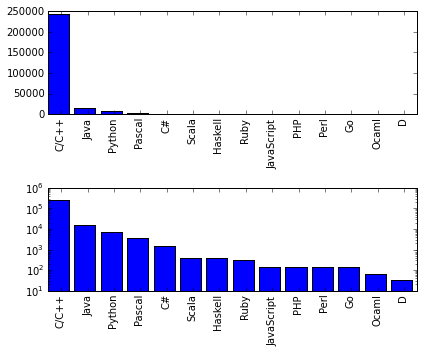

In [8]:
langs, freqs = zip(*freqs)

plt.figure(figsize=(6, 5))

plt.subplot(2, 1, 1)
plt.bar(range(len(langs)), freqs)
plt.xticks(np.arange(len(langs)) + 0.5, langs, rotation='vertical')


plt.subplot(2, 1, 2)
plt.bar(range(len(langs)), freqs, log='true')
plt.xticks(np.arange(len(langs)) + 0.5, langs, rotation='vertical')


plt.tight_layout()
plt.show()

In [9]:
global_frequency = Counter()

for c in code: 
    global_frequency.update(c)

print 'Most common'
print global_frequency.most_common(50)
print 

print 'Least common'
print global_frequency.most_common()[::-1][:50]

Most common
[(u'=', 270969), (u'int', 266348), (u'<', 265763), (u'+', 264083), (u'}', 263338), (u'{', 263139), (u'>', 256898), (u'for', 247814), (u'i', 246505), (u'if', 242464), (u'std', 230431), (u'using', 230037), (u'namespace', 228943), (u'return', 219990), (u'-', 206954), (u'&', 176880), (u'a', 159431), (u'*', 158142), (u'#include', 145390), (u'long', 140629), (u'else', 134176), (u'x', 133884), (u'while', 128018), (u'vector', 124122), (u'printf', 100919), (u'b', 100296), (u'bits', 89250), (u'void', 78475), (u'const', 77856), (u'string', 76437), (u'bool', 75279), (u'size', 74457), (u'map', 73524), (u'm', 73000), (u'typedef', 69420), (u'set', 62022), (u'end', 61699), (u'false', 61470), (u'second', 61146), (u'first', 60624), (u'h', 59481), (u'queue', 59430), (u'c', 59295), (u'begin', 59285), (u'p', 58742), (u'y', 58300), (u's', 56589), (u'double', 56526), (u'break', 53990), (u'r', 53905)]

Least common
[(u'implement', 1), (u'.err', 1), (u'IntOp', 1), (u'sort_asc', 1), (u'c11', 1), (u'

In [10]:
len(global_frequency)

1786

Let's remove some tokens that don't apear frequently enough (say <= 30)

In [11]:
for cnt in code:
    for c in list(cnt):
        if global_frequency[c] <= 30:
            cnt.remove(c)

In [12]:
global_frequency = Counter()

for c in code: 
    global_frequency.update(c)

len(global_frequency)

1075

In [13]:
df = pd.DataFrame(data={'code_bow': code, 'language': languages_normalized})

In [14]:
bow_total = []
for lang, group in df.groupby('language'): 
    bows = Counter()

    for c in group['code_bow'][:50]: 
        bows.update(c)

    bow_total.extend(bows.most_common(50))

del bows

In [15]:
from wordcloud import WordCloud
from scipy.misc import imread

C:\soft\anaconda\2.0.1\lib\site-packages\wordcloud\wordcloud.py:256: UserWarning: mask image should be unsigned byte between 0 and 255. Got a float array
  warnings.warn("mask image should be unsigned byte between 0 and"


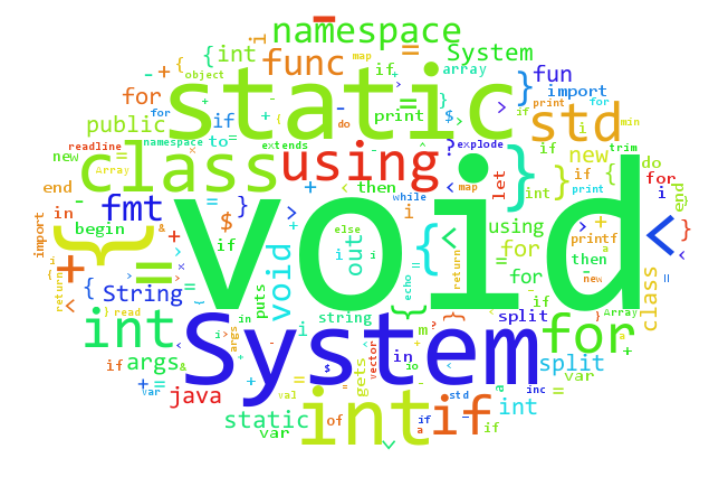

In [16]:
mask = imread('c:/tmp/ellipse.png', flatten=True)

wc = WordCloud(background_color='white', mask=mask, font_path='c:/tmp/consola.ttf')
wc.generate_from_frequencies(bow_total)

plt.figure(figsize=(6 * 2, 4 * 2))
plt.imshow(wc)
plt.axis('off')
plt.show()

## Let's build a classifier

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import StratifiedKFold, StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [18]:
def unwrap_set(s):
    return list(s)

vectorizer = CountVectorizer(analyzer=unwrap_set)
X = vectorizer.fit_transform(code)

In [19]:
X.shape

(273443, 1075)

First, train a model C/C++ vs rest

In [20]:
c_not_c = np.where(df.language == 'C/C++', 'C/C++', 'OTHER')
Counter(c_not_c)

Counter({'C/C++': 244039, 'OTHER': 29404})

In [21]:
skf = StratifiedKFold(c_not_c, 10)
out_of_fold_pred = c_not_c.copy()

aucs = []
for i, (train, test) in enumerate(skf):
    t0 = time.time()

    y_train = c_not_c[train]
    y_test = c_not_c[test]
    X_train = X[train]
    X_test = X[test]

    dt = DecisionTreeClassifier(max_depth=3)
    dt.fit(X_train, y_train)

    pred = dt.predict(X_test)
    out_of_fold_pred[test] = pred

    y_pred = dt.predict_proba(X_test)
    auc = roc_auc_score(y_test == 'C/C++', y_pred[:, 0])
    aucs.append(auc)

    print "done in %fs" % (time.time() - t0)

print np.mean(aucs), np.std(aucs)

done in 2.018000s
done in 1.847000s
done in 1.826000s
done in 1.885000s
done in 1.882000s
done in 1.946000s
done in 1.949000s
done in 1.913000s
done in 1.970000s
done in 1.882000s
0.995918627319 0.00089198819262


In [22]:
pd.DataFrame(confusion_matrix(c_not_c, out_of_fold_pred))

,0,1
0,243367,672
1,236,29168


Let's see what is misclassified

In [23]:
totl = Counter(languages_normalized)

for l, c in Counter(df.language[c_not_c != out_of_fold_pred]).items():
    print '%s: %0.2f%%' % (l, c * 100.0 / totl[l])

Java: 0.08%
D: 2.94%
C/C++: 0.28%
Python: 1.15%
JavaScript: 2.04%
Ocaml: 71.43%
Perl: 2.10%
C#: 1.83%
Pascal: 0.78%
Haskell: 1.09%
Go: 13.29%
PHP: 2.08%
Ruby: 1.54%


Almost all Ocaml sumbissions are misclassified, and ~ 13% of Go. The rest seems fine. Will use this model for further analysis

In [24]:
X_not_c = X[np.where(df.language != 'C/C++')]
lang_not_c = df.language[df.language != 'C/C++']
lang_not_c = np.array(lang_not_c)
y_dummies = pd.get_dummies(lang_not_c)
X_not_c.shape

(29404, 1075)

Let's reduce dimensionality with one-vs-all LASSO SVM

In [25]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

In [26]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_not_c, lang_not_c)
selection_model = SelectFromModel(lsvc, prefit=True)
X_new = selection_model.transform(X_not_c)
X_new.shape

(29404, 94)

Important features:

In [27]:
np.array(vectorizer.get_feature_names())[selection_model._get_support_mask()]

array([u'$', u'&', u'*', u'+', u'-', u'<', u'=', u'>', u'?', u'@',
       u'Array', u'String', u'System', u'Var', u'\\', u'_', u'a', u'and',
       u'args', u'begin', u'boolean', u'chomp', u'class', u'close',
       u'conv', u'count', u'def', u'div', u'do', u'echo', u'else', u'end',
       u'explode', u'extends', u'fmt', u'for', u'fun', u'func',
       u'function', u'gets', u'i', u'if', u'import', u'in', u'inc',
       u'input', u'int', u'integer', u'io', u'java', u'join', u'len',
       u'length', u'let', u'map', u'namespace', u'new', u'object', u'of',
       u'out', u'p', u'parseInt', u'print', u'printf', u'public', u'puts',
       u'range', u'read', u'readline', u'return', u's', u'show', u'solve',
       u'split', u'static', u'std', u'stdin', u'string', u'then',
       u'throws', u'to', u'trim', u'using', u'val', u'var', u'vector',
       u'void', u'where', u'while', u'words', u'write', u'x', u'{', u'}'], 
      dtype='<U12')

In [28]:
skf = StratifiedKFold(lang_not_c, 5)
out_of_fold_pred = lang_not_c.copy()

aucs = []

for i, (train, test) in enumerate(skf):
    t0 = time.time()

    y_train = lang_not_c[train]
    y_test = lang_not_c[test]
    X_train = X_not_c[train]
    X_test = X_not_c[test]

    lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_train, y_train)
    selection_model = SelectFromModel(lsvc, prefit=True)
    X_train = selection_model.transform(X_train)
    X_test = selection_model.transform(X_test)

    dt_rest = DecisionTreeClassifier(max_depth=6)
    dt_rest.fit(X_train, y_train)

    pred = dt_rest.predict(X_test)
    out_of_fold_pred[test] = pred

    pred_score = dt_rest.predict_proba(X_test)
    auc = roc_auc_score(y_dummies.ix[test], pred_score)
    aucs.append(auc)
    
    print "done in %fs" % (time.time() - t0)
print np.mean(aucs), np.std(aucs)

done in 7.863000s
done in 8.281000s
done in 8.332000s
done in 7.611000s
done in 8.565000s
0.975321149448 0.0137730002439


In [29]:
cm = confusion_matrix(lang_not_c, out_of_fold_pred)

print 'actual | predicted -->'
cm = pd.DataFrame(cm, columns=dt_rest.classes_)
cm.index = dt_rest.classes_
cm

actual | predicted -->


,C#,D,Go,Haskell,Java,JavaScript,Ocaml,PHP,Pascal,Perl,Python,Ruby,Scala
C#,1476,0,0,0,10,0,0,0,36,0,4,0,0
D,1,0,0,0,0,0,0,0,31,0,1,0,1
Go,0,0,0,0,0,13,0,0,126,0,1,0,3
Haskell,0,0,0,159,0,0,0,0,170,15,15,2,6
Java,9,0,0,0,15104,0,0,0,14,0,2,0,1
JavaScript,0,0,0,0,3,67,0,0,69,0,8,0,0
Ocaml,0,0,0,0,1,0,18,0,44,0,0,0,0
PHP,0,0,0,0,0,0,0,45,97,0,1,1,0
Pascal,1,0,0,0,1,0,0,0,3714,0,3,9,1
Perl,0,0,0,5,0,0,0,0,10,128,0,0,0


Model has some problems with Pascal, D and Go, but other than that the performance seems OK.

So, the final model is:

In [30]:
# http://chrisstrelioff.ws/sandbox/2015/06/08/decision_trees_in_python_with_scikit_learn_and_pandas.html
# http://stackoverflow.com/a/30104792

def get_code(tree, feature_names, spacer_base='  '):
    left      = tree.tree_.children_left
    right     = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features  = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value
    target_names = tree.classes_

    def recurse(left, right, threshold, features, node, depth):
        spacer = spacer_base * depth
        if threshold[node] != -2:
            # replace <= with > - it reads better for this problem
            # print spacer + "if " + features[node] + " > " + str(threshold[node]) + ":"
            print spacer + "if contains('" + features[node] + "'):"
            if right[node] != -1:
                recurse(left, right, threshold, features, right[node], depth + 1)
            print spacer + "else: # doesn't contain '" + features[node] + "'"
            if left[node] != -1:
                recurse(left, right, threshold, features, left[node], depth + 1)
        else:
            target = value[node]
            
            total_sum = np.sum(target)
            target_name = target_names[target.argmax()]
            target_count = target.max()

            print spacer + "return '%s' # (%0.3f, %d/%d examples)" %  \
                  (target_name, target_count / total_sum, target_count, total_sum)

    recurse(left, right, threshold, features, 0, 0)

In [31]:
dt_first = DecisionTreeClassifier(max_depth=3)
dt_first.fit(X, np.where(df.language == 'C/C++', 'C/C++', 'OTHER'))

y_noc = df.language[df.language != 'C/C++']
X_noc = X[np.where(df.language != 'C/C++')]

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_noc, y_noc)
selection_model = SelectFromModel(lsvc, prefit=True)
X_noc = selection_model.transform(X_noc)

dt_rest = DecisionTreeClassifier(max_depth=6)
dt_rest.fit(X_noc, y_noc)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [32]:
get_code(dt_first, feature_names=vectorizer.get_feature_names())

if contains('std'):
  if contains('import'):
    if contains('scan'):
      return 'C/C++' # (1.000, 3/3 examples)
    else: # doesn't contain 'scan'
      return 'OTHER' # (1.000, 47/47 examples)
  else: # doesn't contain 'import'
    if contains('String'):
      return 'C/C++' # (0.800, 4/5 examples)
    else: # doesn't contain 'String'
      return 'C/C++' # (0.999, 230230/230376 examples)
else: # doesn't contain 'std'
  if contains('printf'):
    if contains('String'):
      return 'OTHER' # (0.992, 604/609 examples)
    else: # doesn't contain 'String'
      return 'C/C++' # (0.993, 12940/13029 examples)
  else: # doesn't contain 'printf'
    if contains('#include'):
      return 'C/C++' # (1.000, 193/193 examples)
    else: # doesn't contain '#include'
      return 'OTHER' # (0.977, 28517/29181 examples)


In [33]:
features = np.array(vectorizer.get_feature_names())
features = features[selection_model._get_support_mask()]
get_code(dt_rest, feature_names=features)

if contains('out'):
  if contains('public'):
    if contains('object'):
      if contains('var'):
        return 'C#' # (1.000, 19/19 examples)
      else: # doesn't contain 'var'
        return 'Java' # (1.000, 3/3 examples)
    else: # doesn't contain 'object'
      if contains('String'):
        if contains('class'):
          if contains('in'):
            return 'Java' # (1.000, 14979/14980 examples)
          else: # doesn't contain 'in'
            return 'Java' # (0.976, 82/84 examples)
        else: # doesn't contain 'class'
          return 'JavaScript' # (1.000, 1/1 examples)
      else: # doesn't contain 'String'
        if contains('java'):
          return 'Java' # (1.000, 7/7 examples)
        else: # doesn't contain 'java'
          if contains('io'):
            return 'Java' # (1.000, 1/1 examples)
          else: # doesn't contain 'io'
            return 'C#' # (1.000, 8/8 examples)
  else: # doesn't contain 'public'
    if contains('object'):
      return 'Scala' # 